In [105]:
#Initializing files
%matplotlib inline
import re
import urllib
import zipfile
import os
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD

#some constants initialization
TRAINING_SUBSET_NUMBER = 0
TESTING_SUBSET_RANGE   = range(1,5)
COMP_RANGE             = range(1,21)
TASK_3_RANGE           = range(4,21)
TASK_3_OFFSET          =3


#Some initialization
url= 'https://raw.githubusercontent.com/mzkaramat/FaceDimenReducer/master/Assignment%202%20Data.zip'
file_name = "yale_dt.zip"
directory_to_extract_to = './yale_dt'

#Download dataset lcoally
testfile = urllib.URLopener()
testfile.retrieve(url, file_name)
print('Downloaded file')

#Creating separate directory
if not os.path.exists(directory_to_extract_to):
    os.makedirs(directory_to_extract_to)
    print('Created directory')
    
#Extracting zip file
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()
print('Unzipping file')

#updating path
directory = directory_to_extract_to+'/yaleBfaces'
    
#printing directories for verification
print('Listing extracted files')
for file in os.listdir(directory):
    print(file)
    
print('Proceeding with further analysis')

Downloaded file
Unzipping file
Listing extracted files
subset3
subset0
subset1
subset2
subset4
Proceeding with further analysis


In [106]:
def read_images(subset_no):
    test_path = directory +'/subset'+str(subset_no)+'/*'
    images = []
    labels = []
    for filename in glob.glob(test_path): 
        match = re.search(r'/person(\d+)', filename)
        labels.append(int(match.group(1)))
        im=Image.open(filename)
        pixels = np.array(im.getdata(), dtype=float).ravel('F')
        pixels = pixels/255
        images.append(pixels)
    print 'Read number of images '+ str(len(images))+' of dimension '+str(len(images[0])) 
    print 'Read labels count '+str(len(labels))
    return images , labels

In [107]:
#reading the training dataset
x_train,y_train = read_images(TRAINING_SUBSET_NUMBER)

Read number of images 70 of dimension 2500
Read labels count 70


In [108]:
#function for first part
def get_singular_comp(images_matrix,number_of_comp):
    # Computing the SVD using components count = 20
    svd = TruncatedSVD(n_components=number_of_comp,  random_state=42)
    svd.fit(images_matrix) 

    print (svd.explained_variance_ratio_) 
    print 'Total explained variance by the first 20 components is ' + str((svd.explained_variance_ratio_.sum()))
    
    return svd

[  4.01426360e-01   1.35028301e-01   9.16147777e-02   7.65265335e-02
   5.07417822e-02   4.71091876e-02   3.93501247e-02   2.63388873e-02
   2.56137540e-02   1.93400308e-02   1.75901326e-02   1.40711790e-02
   6.19118045e-05   5.87332794e-05   5.53361775e-05   3.10112657e-05
   2.82252926e-05   2.65245233e-05   2.32359724e-05   1.90496189e-05]
Total explained variance by the first 20 components is 0.945055078845


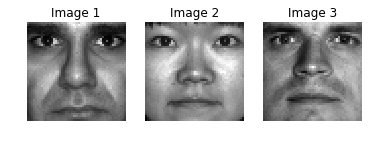

In [109]:
#get the first 20 singular components
svd = get_singular_comp(x_train,20)

#Transforming the svd on the input vectorized image matrix
image_list = svd.transform(x_train)

#Reversing the SVD
inv_img = svd.inverse_transform(image_list)

#plotting the first three vectors as images
plt.figure(1)
plt.rcParams["figure.figsize"] = (4,3)


plt.subplot(131)
plt.imshow(np.reshape(inv_img[0], (50, 50)), cmap='gray')
plt.axis('off')
plt.title('Image 1')

plt.subplot(132)
plt.imshow(np.reshape(inv_img[1], (50, 50)), cmap='gray')
plt.axis('off')
plt.title('Image 2')

plt.subplot(133)
plt.imshow(np.reshape(inv_img[2], (50, 50)), cmap='gray')
plt.axis('off')
plt.title('Image 3')

plt.show()

In [110]:
#task 2 function
def get_classif_error(x_train,y_train,x_test,y_test,svd,number_of_comp,offset=0):

    #Transforming the svd on the input vectorized image matrix
    x_train = svd.transform(x_train)
    x_test = svd.transform(x_test)
    
    #using thee neighbours and power of 2 for euclidean distance
    knn_classifier = KNeighborsClassifier(n_neighbors=3, p=2)  
    #training the classifier using number_of_comp of components
    knn_classifier.fit(x_train[:,offset:number_of_comp], y_train)  

    #accuracy on the test dataset
    acc = knn_classifier.score(x_test[:,offset:number_of_comp],y_test)
    
    return acc

In [111]:
comp_acc = []
#looping for first 20 components
for i in COMP_RANGE:
    test_accuracy = []
    #looping over first test dataset
    for j in TESTING_SUBSET_RANGE:
        x_test,y_test = read_images(j)
        #getting the accuracy
        acc = get_classif_error(x_train,y_train,x_test,y_test,svd,i)
        test_accuracy.append(acc)
    comp_acc.append(test_accuracy)
    print 'Mean accuracy for number of components '+str(j)+' is '+str(round(np.mean(test_accuracy),2))+'\n'

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.13

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.19

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.19

Read number of images 120 of dimension 2500
Read labels co

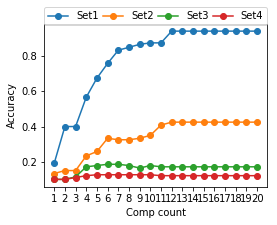

In [ ]:
comp_acc = np.matrix(comp_acc).transpose()

for i in range(0,4):
    plt.plot(COMP_RANGE, comp_acc[i].tolist()[0], label='Set'+str(i+1), marker='o')  # Plot every subset
    plt.ylabel('Accuracy')
    plt.xlabel('Comp count')
plt.xticks(np.arange(COMP_RANGE[0], COMP_RANGE[-1] + 1, 1.0))
plt.legend(bbox_to_anchor=(0., 1., 1., .102), ncol=4, mode="expand", borderaxespad=0.)
plt.show()

In [ ]:
comp_acc = []
#looping for first 20 components
for i in TASK_3_RANGE:
    test_accuracy = []
    #looping over first test dataset
    for j in TESTING_SUBSET_RANGE:
        x_test,y_test = read_images(j)
        #getting the accuracy
        acc = get_classif_error(x_train,y_train,x_test,y_test,svd,i,TASK_3_OFFSET)
        test_accuracy.append(acc)
    comp_acc.append(test_accuracy)
    print 'Mean accuracy for number of components '+str(j)+' is '+str(round(np.mean(test_accuracy),2))+'\n'

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.15

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.2

Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 120 of dimension 2500
Read labels count 120
Read number of images 140 of dimension 2500
Read labels count 140
Read number of images 190 of dimension 2500
Read labels count 190
Mean accuracy for number of components 4 is 0.29

Read number of images 120 of dimension 2500
Read labels cou

In [ ]:
comp_acc = np.matrix(comp_acc).transpose()

for i in range(0,4):
    plt.plot(TASK_3_RANGE, comp_acc[i].tolist()[0], label='Set'+str(i+1), marker='o')  # Plot every subset
    plt.ylabel('Accuracy')
    plt.xlabel('Comp count')
plt.xticks(np.arange(TASK_3_RANGE[0], TASK_3_RANGE[-1] + 1, 1.0))
plt.legend(bbox_to_anchor=(0., 1., 1., .102), ncol=4, mode="expand", borderaxespad=0.)
plt.show()

The above accuracy graphs shows that by not using first three singular values, we can classify the images better by using three nearest neibhour strategy. 